# Welcome to my notebook..

Geospatial Clustering Notebook sample :) 

In [1]:
import numpy as np
import pandas as pd

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
df_target = pd.read_csv('Data_1.csv')

In [58]:
df_target.head()

,Unnamed: 0,id,lat,lon,tags,type
0,0,148680663,47.555612,9.688680,marketplace,node
1,1,240937972,50.965599,7.182943,marketplace,node
2,2,255897613,49.880786,8.660928,marketplace,node
3,3,276043329,53.327598,9.878438,marketplace,node
4,4,293994974,53.093369,8.810666,marketplace,node


In [59]:
df_target.drop(df_target.columns[0], axis=1)

,id,lat,lon,tags,type
0,148680663,47.555612,9.688680,marketplace,node
1,240937972,50.965599,7.182943,marketplace,node
2,255897613,49.880786,8.660928,marketplace,node
3,276043329,53.327598,9.878438,marketplace,node
4,293994974,53.093369,8.810666,marketplace,node
...,...,...,...,...,...
134347,6858753102,53.169617,8.702026,post_office,node
134348,6859841376,49.849712,7.889525,post_office,node
134349,6862942160,49.394662,8.796487,post_office,node
134350,6863015079,49.838985,8.702550,post_office,node


In [60]:
# choose columns
df_target = df_target[['id', 'lat', 'lon','tags']]
df_target.head(10)

,id,lat,lon,tags
0,148680663,47.555612,9.688680,marketplace
1,240937972,50.965599,7.182943,marketplace
2,255897613,49.880786,8.660928,marketplace
3,276043329,53.327598,9.878438,marketplace
4,293994974,53.093369,8.810666,marketplace
5,310254200,53.434488,8.821352,marketplace
6,359885958,50.391747,8.192193,marketplace
7,375779845,50.931824,7.025336,marketplace
8,392491700,53.586377,10.045311,marketplace
9,428178744,53.489726,10.181960,marketplace


In [61]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [62]:
# Label Encoding the amenity types
labelencoder = LabelEncoder()
labelencoder.fit(df_target.iloc[:,3].values)
df_target.iloc[:,3]=labelencoder.transform(df_target.iloc[:,3])

In [66]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

Clus_dataSet = df_target
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.9, min_samples=4).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_target['Clus_Db']=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

# A sample of clusters
print(df_target[['Clus_Db']].head())

# number of labels
print("number of labels: ", set(labels))

   Clus_Db
0        0
1        0
2        0
3        0
4        0
number of labels:  {0, 1, 2, 3, 4, 5}


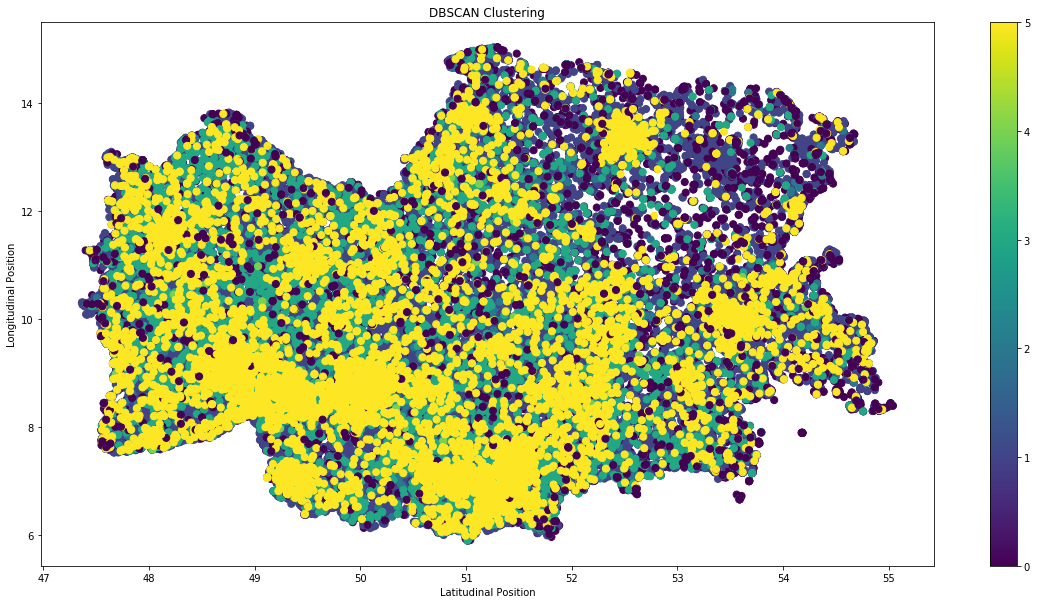

In [74]:
#Plot the clusters obtained using k means
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(df_target['lat'],df_target['lon'],
                     c=labels,s=50)
ax.set_title('DBSCAN Clustering')
ax.set_xlabel('Latitudinal Position')
ax.set_ylabel('Longitudinal Position')
plt.colorbar(scatter)

In [70]:
ans = labelencoder.inverse_transform(labels)

In [71]:
ans

array(['bank', 'bank', 'bank', ..., 'post_office', 'post_office',
       'post_office'], dtype=object)

In [72]:
final_df=pd.DataFrame({'id':df_target['id'].values,'lat':df_target['lat'].values,'lon':df_target['lon'].values,'tags':df_target['tags'].values,'cluster':ans})

In [73]:
final_df.head()

,id,lat,lon,tags,cluster
0,148680663,47.555612,9.688680,3,bank
1,240937972,50.965599,7.182943,3,bank
2,255897613,49.880786,8.660928,3,bank
3,276043329,53.327598,9.878438,3,bank
4,293994974,53.093369,8.810666,3,bank


In [56]:
# Clustering on Lat+Lon+Tag